<a href="https://colab.research.google.com/github/guthi1/statistics-dump/blob/main/wine_testing_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wine quality analysis

In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from plotly.offline import iplot
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

BASE_PATH = "/content/"

In [2]:
full_dataset = pd.read_csv(f"{BASE_PATH}wine_data.csv")

In [3]:
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    6497 non-null   int64  
 1   groupe                6497 non-null   object 
 2   Y_qualite             6497 non-null   int64  
 3    Z_qualite            6497 non-null   object 
 4    couleur              6497 non-null   object 
 5   fixed_acidity         6497 non-null   float64
 6   volatile_acidity      6497 non-null   float64
 7   citric_acid           6497 non-null   float64
 8   residual_sugar        6497 non-null   float64
 9   chlorides             6497 non-null   float64
 10  free_sulfur_dioxide   6497 non-null   float64
 11  total_sulfur_dioxide  6497 non-null   int64  
 12  density               6497 non-null   float64
 13  pH                    6497 non-null   float64
 14  sulphates             6497 non-null   float64
 15  alcohol              

In [4]:
full_dataset.head(5)

ID    groupe  Y_qualite  Z_qualite  couleur  fixed_acidity  \
0   1     train          5         OK    rouge            7.4   
1   2  validate          5         OK    rouge            7.8   
2   3  validate          5         OK    rouge            7.8   
3   4     train          6         OK    rouge           11.2   
4   5     train          5         OK    rouge            7.4   

   volatile_acidity  citric_acid  residual_sugar  chlorides  \
0              0.70         0.00             1.9      0.076   
1              0.88         0.00             2.6      0.098   
2              0.76         0.04             2.3      0.092   
3              0.28         0.56             1.9      0.075   
4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                    34   0.9978  3.51       0.56   
1                 25.0                    67   0.9968  3.20       0.68   
2                 15.0                    54   0.9970  3.26       0.65   
3                 17.0                    60   0.9980  3.16       0.58   
4                 11.0                    34   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4

In [5]:
feature_colum_names = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']

## a) Compare, using cross-tabulations and appropriate statistical tests, the 3 subsets to decide if they are relatively similar (homogeneous) for the response variable Y (QUALITY).

### Split the data into training, valid and test set to check if the distribution are the same

In [6]:
# Split the data
train = full_dataset[full_dataset['groupe'] == 'train']
print(f'Amount of data point in train: {train.shape}')

valid = full_dataset[full_dataset['groupe'] == 'validate']
print(f'Amount of data point in valid: {valid.shape}')

test  = full_dataset[full_dataset['groupe'] == 'test']
print(f'Amount of data point in test : {test.shape}')


Amount of data point in train: (3916, 16)
Amount of data point in valid: (1317, 16)
Amount of data point in test : (1264, 16)


### Check the composition of the differet split

In [7]:
train_without_id = train[feature_colum_names + ['Y_qualite']]
valid_without_id = valid[feature_colum_names + ['Y_qualite']]
test_without_id  = test[feature_colum_names + ['Y_qualite']]

In [8]:
from google.colab import data_table
print("Train")
display(data_table.DataTable(train_without_id.describe().round(3), include_index=True, min_width="300"))
print("\nValid")
display(data_table.DataTable(valid_without_id.describe().round(3), include_index=True, min_width="300"))
print("\nTest")
display(data_table.DataTable(test_without_id.describe().round(3), include_index=True, min_width="300"))

Train



Valid



Test


Étant donné que nous allons utiliser ces ensembles de données pour créer un modèle de prédiction de qualité de vin, il est important de s'assurer que les ensembles sont relativement similaires. En effet, des différences significatives entre les ensembles peuvent potentiellement affecter les performances du modèle et entraîner des prévisions biaisées.


La première observation à effectuer est la quantité de données dans chaque ensemble de données. Le jeu de données propose une distribution de 60% (3916 données) pour l'ensemble d'entraînement du modèle, 21% (1317 données) pour l'ensemble de validation et 19% (1264 données) pour l'ensemble de test. Ces proportions vont permettre d'évaluer la qualité du modèle créé avec de nouvelles données non observées dans le passé.


Maintenant que les proportions d'allocation des ensembles ont été vérifiées, le prochain point important est d'examiner la distribution des différentes variables physico-chimiques. Celles-ci sont très similaires pour les variables qui seront utilisées pour effectuer la prédiction. On observe des moyennes extrêmement similaires, avec la plus grande différence étant de 2% pour l'indicateur de chlorures, et ces variables ont une déviation standard quasi identique. Une différence observée entre les ensembles concerne les extrêmes : l'ensemble de validation et de test comportent des données ayant des valeurs d'extrêmes plus élevées que les données de l'ensemble d'entraînement. Il sera intéressant d'évaluer les résultats de ces ensembles plus tard et de voir comment le modèle se comporte dans ce cas.

---

Since we are going to use these data sets to create a wine quality prediction model, it is important to ensure that the sets are relatively similar. Indeed, significant differences between the sets could potentially affect the performance of the model and lead to biased forecasts.

The first observation to be made is the amount of data in each data set. The data set proposes a distribution of 60% (3916 data) for the training set of the model, 21% (1317 data) for the validation set, and 19% (1264 data) for the test set. These proportions will allow us to evaluate the quality of the model created with new data that has not been observed in the past.

Now that the allocation proportions of the sets have been verified, the next important point is to examine the distribution of the various physicochemical variables. These are very similar for the variables that will be used to perform the prediction. We observe extremely similar means, with the largest difference being 2% for the indicator of chlorides, and these variables have a quasi-identical standard deviation. One difference observed between the sets concerns the extremes: the validation and test sets contain data with higher extreme values than the training set data. It will be interesting to evaluate the results of these sets later and see how the model behaves in this case.


In [9]:
print("Train")
pivot_train = train.pivot_table(feature_colum_names,['Y_qualite'], aggfunc='median')
display(data_table.DataTable(pivot_train.round(3), include_index=True, min_width="300"))

print("\nValid")
pivot_valid = valid.pivot_table(feature_colum_names,['Y_qualite'], aggfunc='median')
display(data_table.DataTable(pivot_valid.round(3), include_index=True, min_width="300"))

print("\nTest")
pivot_test = test.pivot_table(feature_colum_names,['Y_qualite'], aggfunc='median')
display(data_table.DataTable(pivot_test.round(3), include_index=True, min_width="300"))


Train



Valid



Test


la prochaine étape de l'analyse consiste à examiner la distribution de nos données en fonction de la variable à prédire. Nous remarquons tout d'abord que bien que la valeur de qualité se situe dans une plage allant de 1 à 10, les juges n'attribuent des notes qu'entre 3 et 9.

Pour cette analyse, nous avons choisi d'utiliser la médiane plutôt que la moyenne afin de mieux comprendre la distribution des données. La médiane représente la valeur centrale d'un ensemble de données et n'est pas affectée par les valeurs aberrantes ou extrêmes, ce qui en fait une mesure plus robuste de la tendance centrale des données, notamment dans les cas où nous avons moins de données, comme dans le cas des qualités de vin.

Les résultats obtenus nous donnent une meilleure idée des différences entre nos ensembles de données. Les distributions pour les vins de "bonne" qualité sont très similaires, mais des problèmes surviennent avec les distributions pour les ensembles plus extrêmes, c'est-à-dire les vins de très mauvaise qualité et les vins d'excellente qualité. Nous observons dans ces distributions des valeurs centrales pouvant être jusqu'à cinq fois plus grande (ex: qualité 9 : indicateur residual_sugar).

Cependant, il est logique que la distribution des vins ayant une qualité de 9 soit plus petite et que ces vins ne soient pas similaire entre eux, car un vin exceptionnel se distingue par le fait qu'il ne ressemble à aucun autre.

---

The next step in the analysis is to examine the distribution of our data with respect to the target variable. We first notice that although the quality value ranges from 1 to 10, judges only give scores between 3 and 9.

For this analysis, we chose to use the median instead of the mean to better understand the distribution of the data. The median represents the central value of a data set and is not affected by outliers or extreme values, making it a more robust measure of central tendency, especially in cases where we have less data, such as in the case of wine quality.

The results obtained give us a better idea of the differences between our data sets. The distributions for "good" quality wines are very similar, but problems arise with the distributions for the more extreme sets, such as very poor quality wines and excellent quality wines. We observe in these distributions central values that can be up to five times larger (e.g., quality 9: residual_sugar indicator).

However, it makes sense that the distribution of wines with a quality of 9 is smaller and that these wines are not similar to each other, as an exceptional wine stands out by not resembling any other.

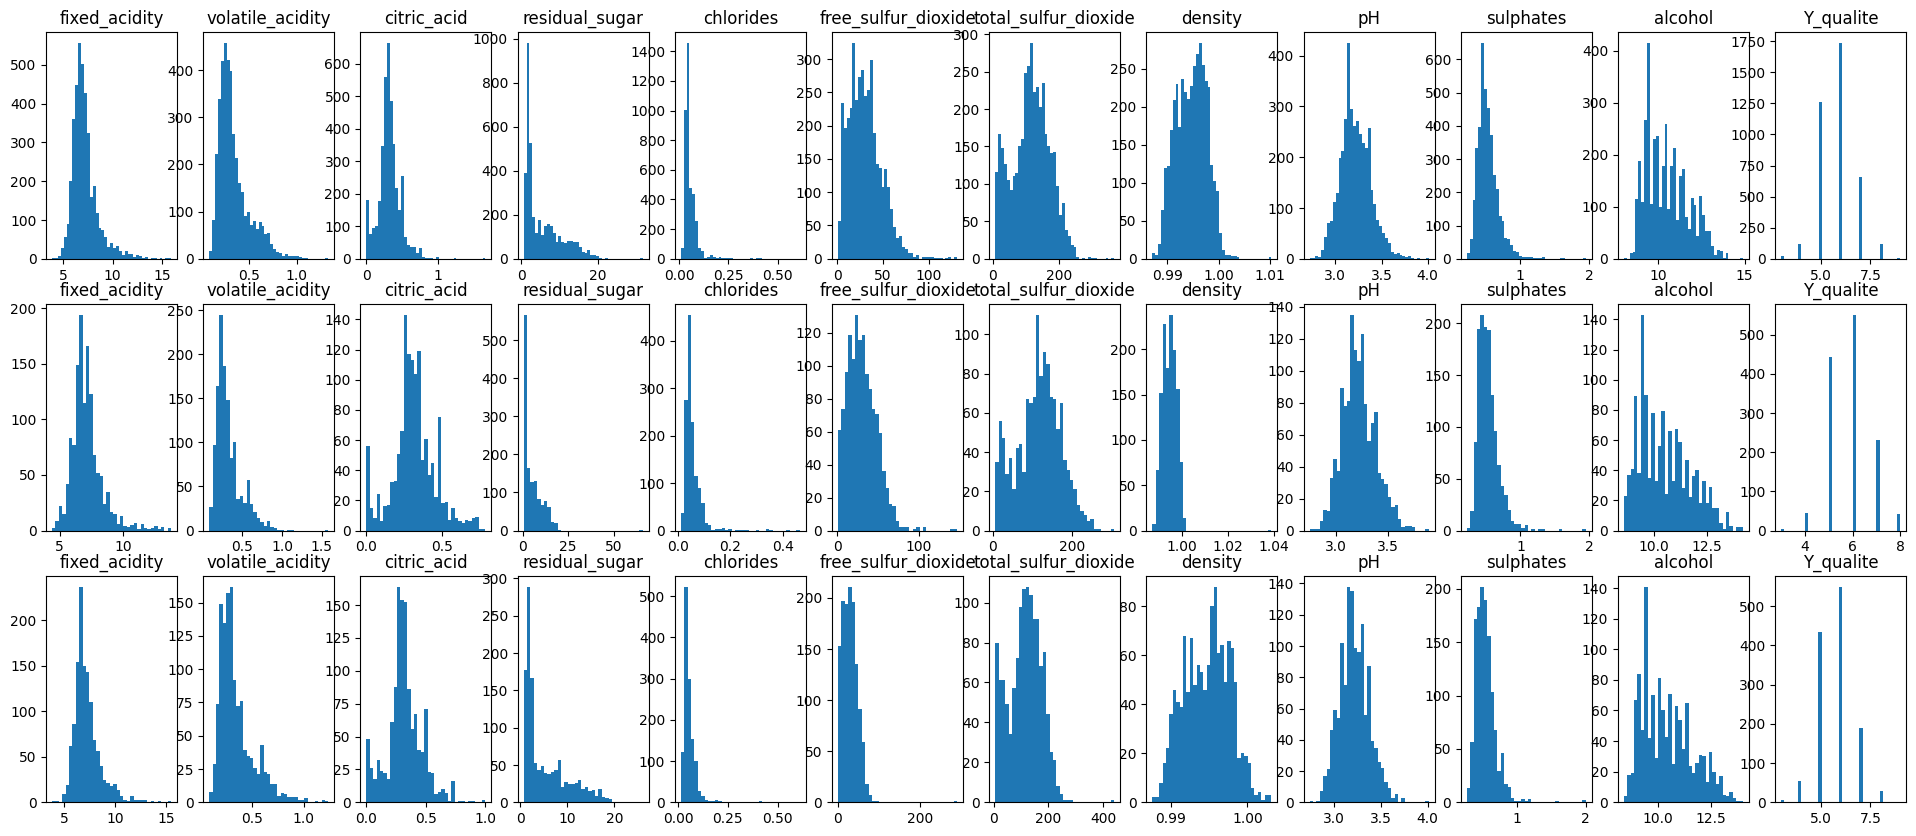

In [10]:
fig, axs = plt.subplots(3, train_without_id.shape[1], figsize=(24, 10))

for i, df in enumerate([train_without_id, valid_without_id, test_without_id]):
    for j in range(df.shape[1]):
        axs[i, j].hist(df.iloc[:, j], bins=int(5*np.log(len(df))))
        axs[i, j].set_title(df.columns[j])

plt.show()

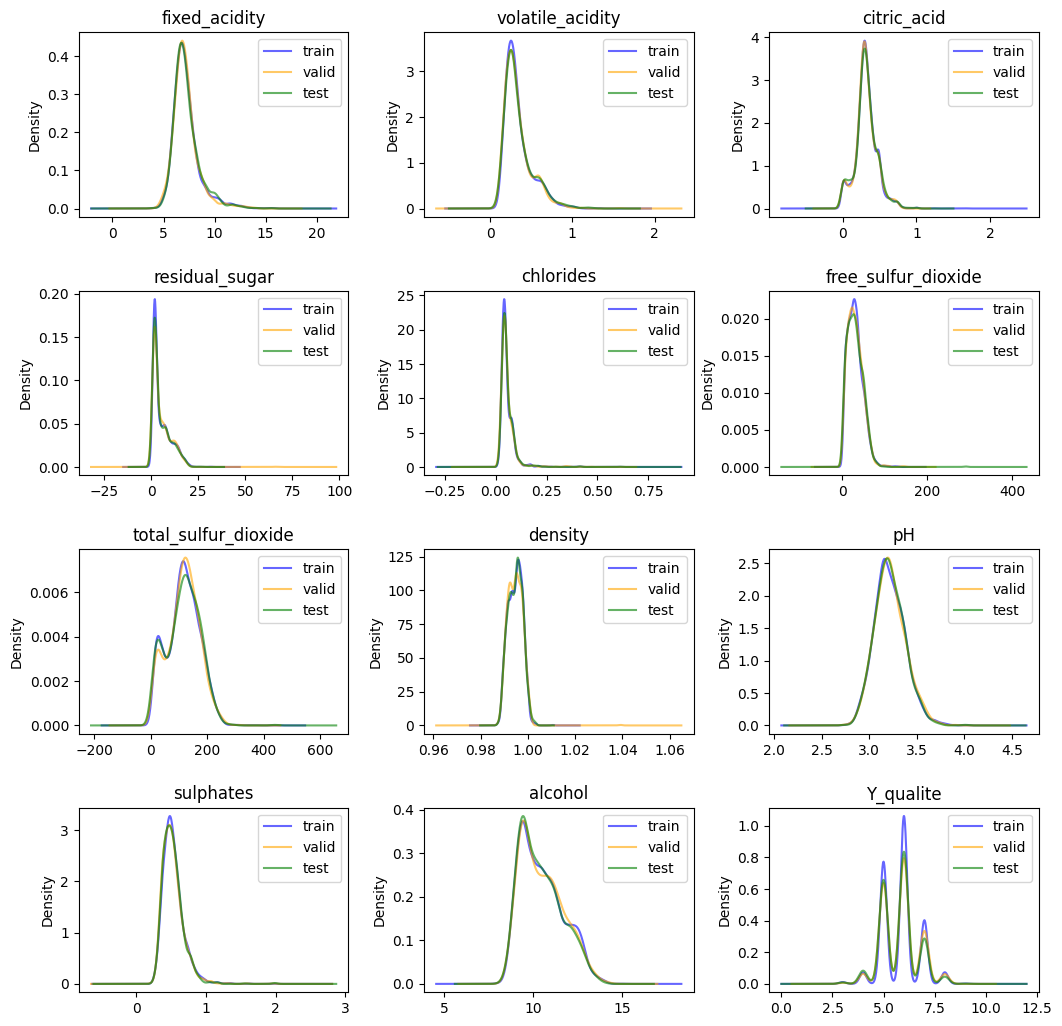

In [11]:
fig, axs = plt.subplots(len(train_without_id.columns)//3, 3, figsize=(12, 12))
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.28, hspace=0.4)

colors = ['blue', 'orange', 'green']
labels = ['train', 'valid', 'test']
dfs = [train_without_id, valid_without_id, test_without_id]

for i, col_name in enumerate(train_without_id.columns):
    row_idx, col_idx = i//3, i%3
    axs[row_idx, col_idx].set_title(col_name)
    for j, df in enumerate(dfs):
        df[col_name].plot(kind='density', color=colors[j], ax=axs[row_idx, col_idx], alpha=0.6, label=labels[j])
    axs[row_idx, col_idx].legend()
    
plt.show()

La prochaine étape consiste à examiner la similarité des distributions de variables entre les trois ensembles de données pour s'assurer qu'elles sont similaires. Il est observé que c'est effectivement le cas pour toutes les variables physico-chimiques. Certaines d'entre elles semblent suivre un mélange de lois normales (avec des pics multiples), ce qui pourrait être dû au fait qu'il y a deux types de vin (rouge et blanc) ou deux sous-groupes qui expliquent la variable dépendante, entre autres raisons. Ce point devra être déterminé.

La variable avec une différence significative dans la distribution est la qualité (variable dépendante). On observe que l'ensemble d'entraînement a une densité plus élevée, mais les différents pics sont plus ou moins représentés de manière proportionnelle dans les trois ensembles, ce qui indique qu'il n'y a pas de problème. (Conclusion vérifier avec les 3 prochains graphiques)

---

The next step is to examine the similarity of the variable distributions across the three datasets to ensure that they appear similar. It is observed that this is indeed the case for all of the physicochemical variables. Some of them appear to follow a mixture of normal distributions (with multiple peaks), which could be due to the fact that there are two types of wine (red and white) or two subgroups that explain the dependent variable, among other reasons. This point will need to be determined.

The variable with a significant difference in distribution is the quality (dependent variable). It is observed that the training set has a higher density, but the different peaks are more or less proportionally represented across the three sets, indicating no problem. (Conclusion verified with the next 3 graphs)

<ipython-input-12-9418da535987>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




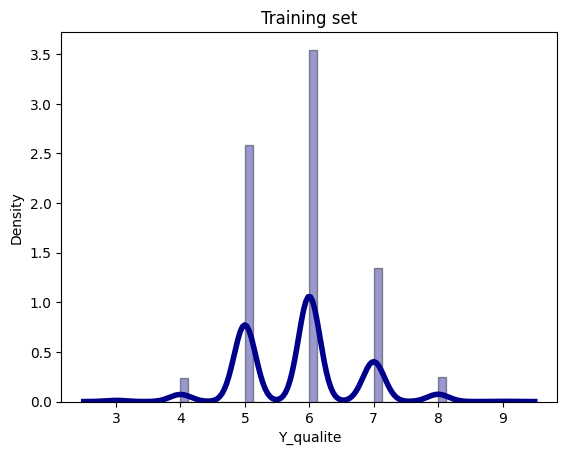

In [12]:
sns.distplot(train_without_id['Y_qualite'], hist=True, kde=True,
             bins='auto', color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title("Training set")
plt.show()

<ipython-input-13-3092d8be1d52>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




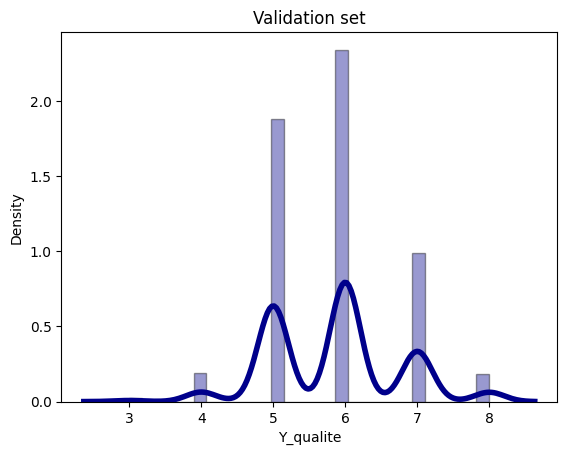

In [13]:
sns.distplot(valid_without_id['Y_qualite'], hist=True, kde=True,
             bins='auto', color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title("Validation set")
plt.show()

<ipython-input-14-b95840cb67e4>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




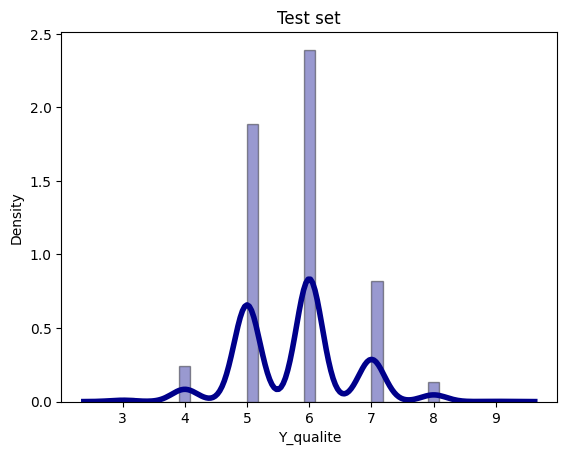

In [14]:
sns.distplot(test_without_id['Y_qualite'], hist=True, kde=True,
             bins='auto', color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title("Test set")
plt.show()

### Evaluation of the correlation of variables 

In [15]:
corr_matrix = train.corr()
corr_matrix["Y_qualite"].sort_values(ascending=False)

Y_qualite               1.000000
alcohol                 0.448594
ID                      0.117979
citric_acid             0.082832
free_sulfur_dioxide     0.055582
sulphates               0.029403
pH                      0.026217
total_sulfur_dioxide   -0.044794
residual_sugar         -0.051684
fixed_acidity          -0.078755
chlorides              -0.203099
volatile_acidity       -0.264731
density                -0.322994
Name: Y_qualite, dtype: float64

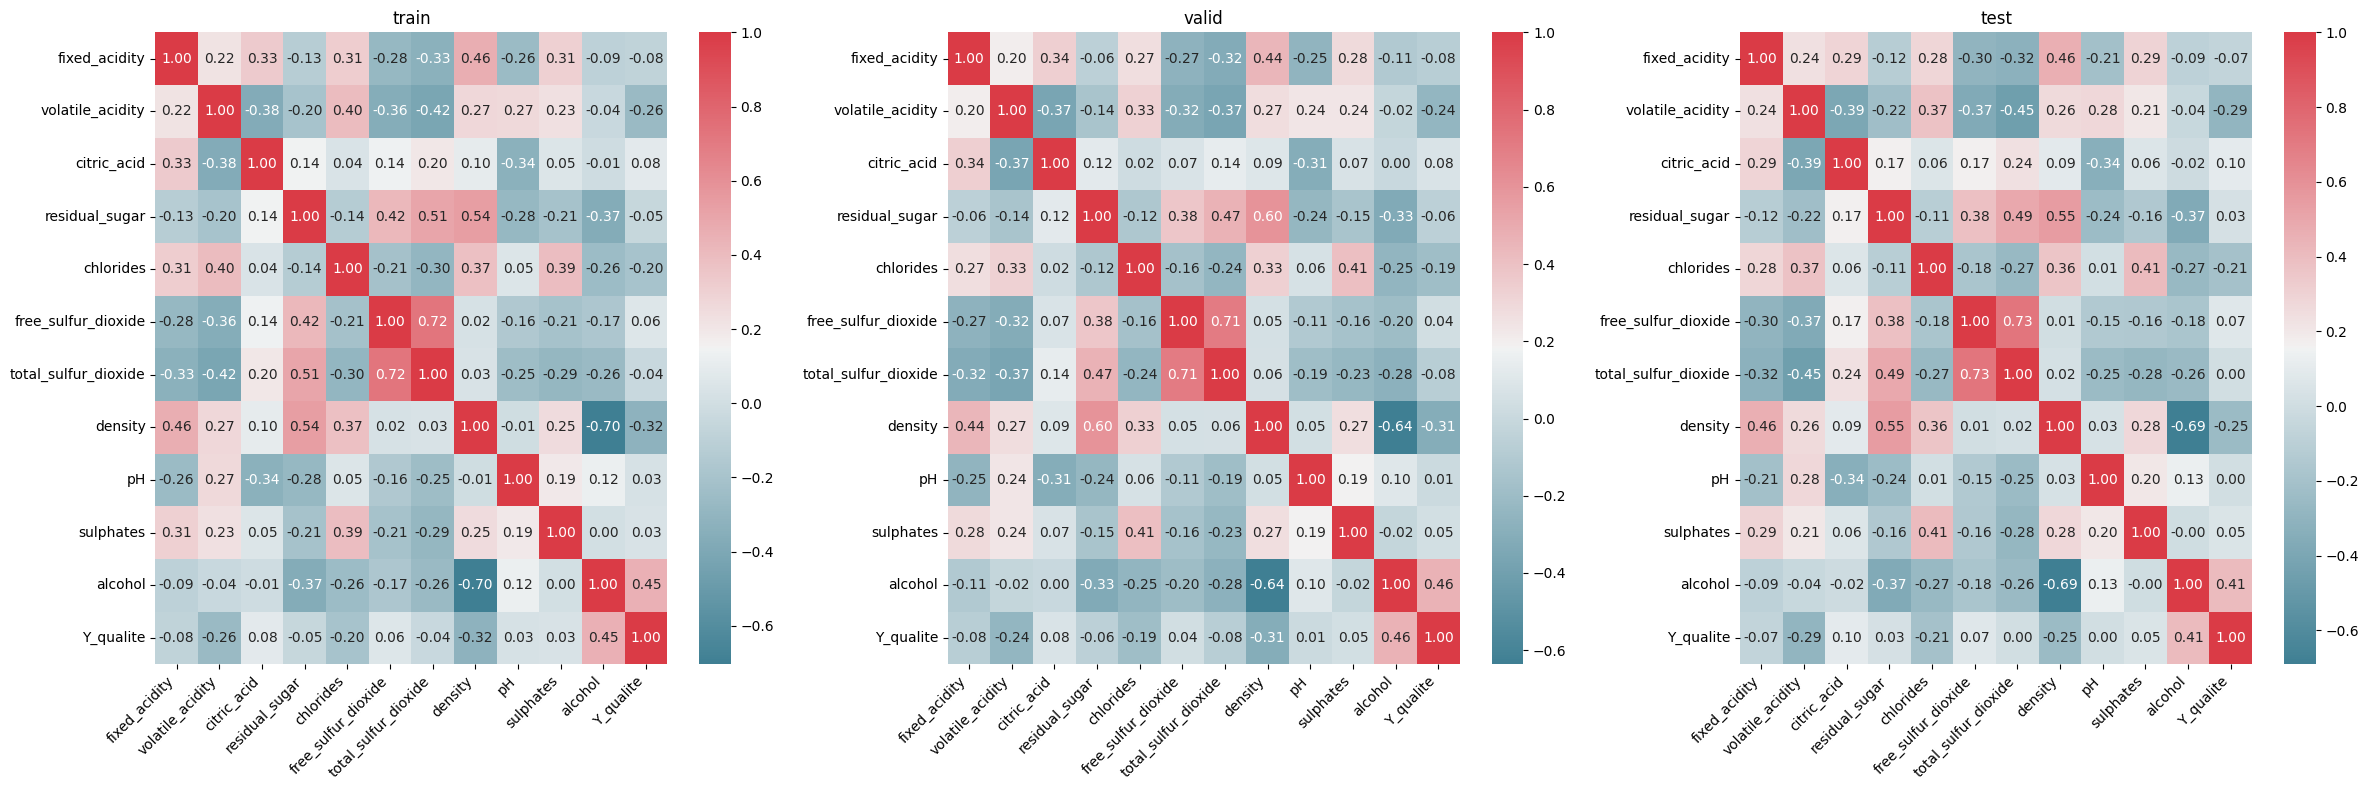

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(24, 8))

dfs = [train_without_id, valid_without_id, test_without_id]
labels = ['train', 'valid', 'test']

for i, df in enumerate(dfs):
    correlations = df.corr()
    # Generate Color Map
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    # Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(correlations, cmap=colormap, annot=True, fmt=".2f", ax=axs[i])
    axs[i].set_xticklabels(
        df.columns,
        rotation=45,
        horizontalalignment='right'
    )
    axs[i].set_yticklabels(df.columns)
    axs[i].set_title(labels[i])

plt.tight_layout()
plt.show()


Pour évaluer la corrélation entre deux variables, nous utilisons le coefficient de corrélation de Pearson, qui mesure la force de la relation linéaire entre deux variables continues. Ce coefficient varie entre -1 et 1, où une valeur proche de 1 indique une corrélation positive forte, une valeur proche de -1 indique une corrélation négative forte, et une valeur proche de 0 indique une absence de corrélation.

Pour interpréter les résultats, nous utilisons la matrice de corrélation et un graphique de dispersion. Une matrice de corrélation vous permet de visualiser la corrélation entre plusieurs paires de variables simultanément, tandis qu'un graphique de dispersion permet de visualiser la relation entre deux variables spécifiques. 

**Matrice de corrélation**

La matrice de corrélation révèle que, lorsqu'une seule variable est prise en compte, la quantité d'alcool est la variable la plus fortement corrélée à la qualité du vin, suivie de la densité et de la volatilité de l'acidité, cette dernière étant très proche des chlorures. Il est à noter que la densité et l'alcool présentent une forte corrélation (-0,70), étant ainsi les deux variables les plus explicatives.

De plus, les mêmes conclusions peuvent être effectuées sur les deux autres ensembles.

---

To assess the correlation between two variables, we use the Pearson correlation coefficient, which measures the strength of the linear relationship between two continuous variables. This coefficient varies between -1 and 1, where a value close to 1 indicates a strong positive correlation, a value close to -1 indicates a strong negative correlation, and a value close to 0 indicates no correlation.

To interpret the results, we use the correlation matrix and a scatter plot. A correlation matrix allows you to visualize the correlation between several pairs of variables simultaneously, while a scatter plot allows you to visualize the relationship between two specific variables.

**Correlation Matrix**

The correlation matrix reveals that, when considering a single variable, the alcohol content is the variable most strongly correlated with wine quality, followed by density and acidity volatility, with the latter being very close to chlorides. It should be noted that density and alcohol show a strong correlation (-0.70), making them the two most explanatory variables.

Furthermore, the same conclusions can be drawn for the other two datasets.

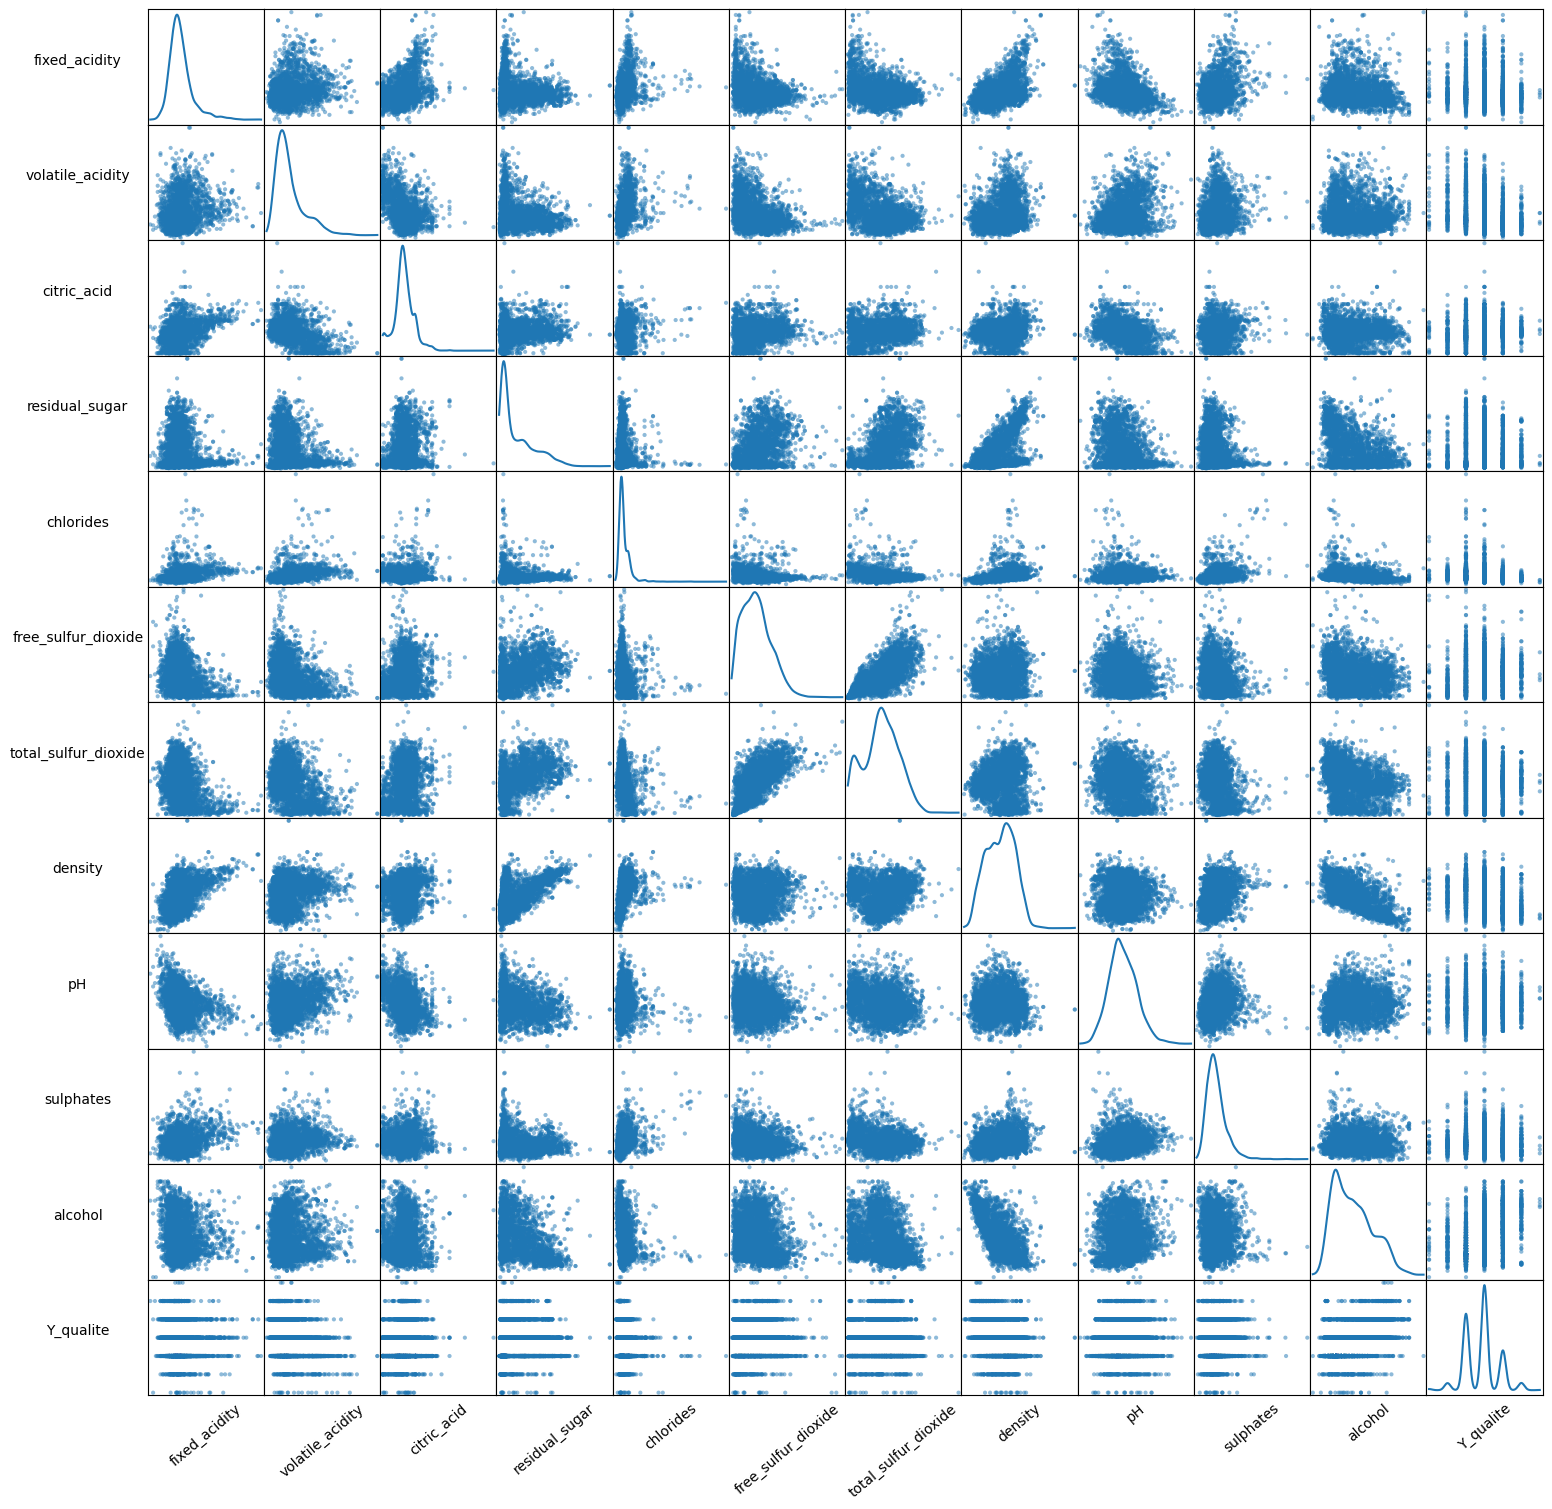

In [17]:
sm = scatter_matrix(train_without_id, figsize=(18, 18), diagonal='kde')
#Change label rotation
[s.xaxis.label.set_rotation(40) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]
#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-0.6,0.5) for s in sm.reshape(-1)]
#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]
plt.show()

**Graphique de dispersion**

En examinant le graphique de dispersion, il est plus difficile de conclure quelle variable sera la plus efficace pour prédire la qualité du vin. On observe des distributions très complexes entre les variables, lesquelles ont le potentiel d'aider à expliquer la qualité si elles sont utilisées dans un modèle non linéaire.

---

**Scatter plot**

By examining the scatter plot, it is more difficult to conclude which variable will be the most effective in predicting the quality of the wine. Complex distributions are observed between the variables, which have the potential to help explain quality if used in a non-linear model.

### Check the data again the color of the wine

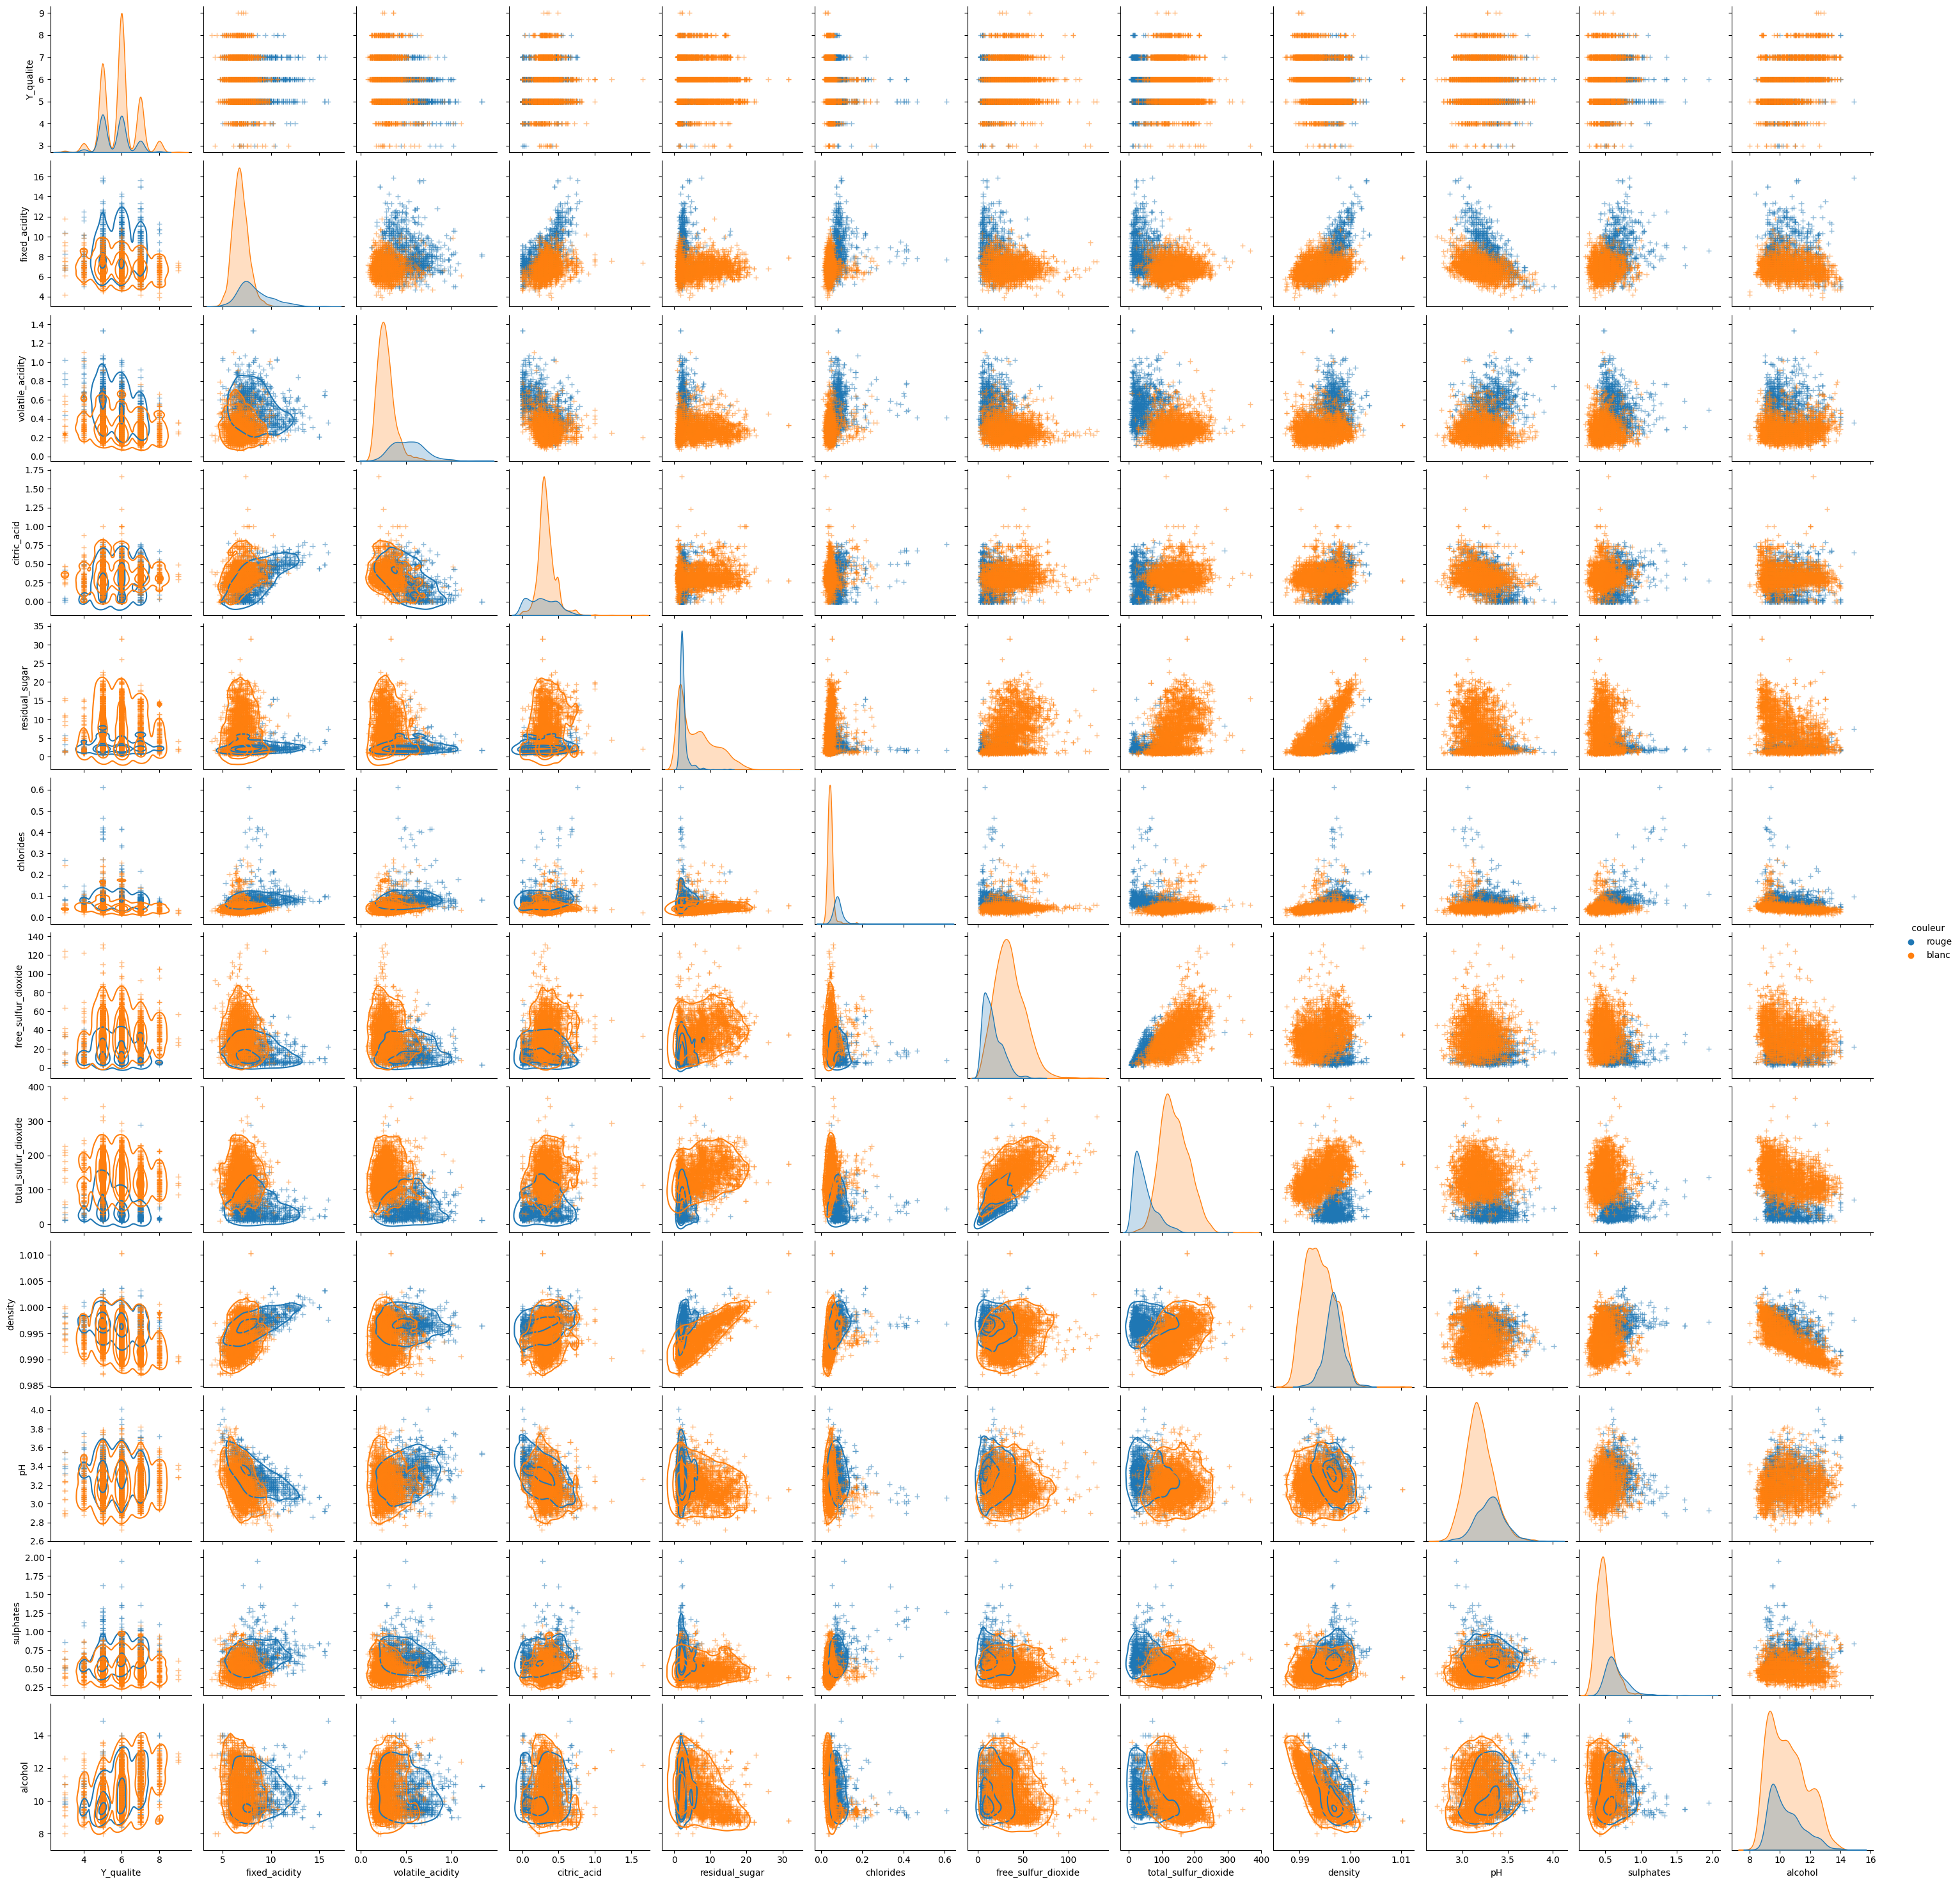

In [18]:
#scatter plots
# df=train[['alcohol','volatile_acidity','density',' Z_qualite']]
df=train[['Y_qualite', ' couleur', 'fixed_acidity',
       'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides',
       'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH',
       'sulphates', 'alcohol']]
g=sns.pairplot(df,hue=' couleur', plot_kws=dict(marker="+", linewidth=1, alpha= 0.5),  diag_kind="kde")

g.map_lower(sns.kdeplot, levels=4, color=".2")


Après avoir effectué notre analyse préliminaire, la prochaine étape importante est d'examiner l'effet de la variable catégorique du type de vin (blanc ou rouge). Pour ce faire, nous reprenons le graphique de dispersion et identifions les observations selon la couleur du vin.

Premièrement, nous observons que les distributions entre les variables changent considérablement entre les deux types de vin. Nous avons précédemment constaté que certaines variables pouvaient être expliquées par un mélange de lois de probabilité, et nous observons maintenant que la couleur du vin est la variable explicative de ce phénomène. Avec cette information en tête, nous pouvons envisager l'utilisation d'un seul modèle pour la classification de la qualité d'un vin, car les différences entre les distributions des deux couleurs sont significatives.

---

After performing our preliminary analysis, the next important step is to examine the effect of the categorical variable of wine type (white or red). To do this, we revisit the scatter plot and identify observations based on wine color.

Firstly, we observe that the distributions between the variables change significantly between the two types of wine. We previously noted that some variables could be explained by a mixture of probability laws, and we now observe that wine color is the explanatory variable for this phenomenon. With this information in mind, we can consider using a single model for the classification of wine quality, as the differences between the distributions of the two colors are significant.








## b) Using the stepwise regression method, develop a regression model of Y based on the 11 physicochemical variables for all red and white wines. Identify the critical (important) variables for wine quality.

In [ ]:
!pip install mlxtend

In [105]:
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib

In [106]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [107]:
train.head()

ID groupe  Y_qualite  Z_qualite  couleur  fixed_acidity  volatile_acidity  \
0   1  train          5         OK    rouge            7.4              0.70   
3   4  train          6         OK    rouge           11.2              0.28   
4   5  train          5         OK    rouge            7.4              0.70   
5   6  train          5         OK    rouge            7.4              0.66   
6   7  train          5         OK    rouge            7.9              0.60   

   citric_acid  residual_sugar  chlorides  free_sulfur_dioxide  \
0         0.00             1.9      0.076                 11.0   
3         0.56             1.9      0.075                 17.0   
4         0.00             1.9      0.076                 11.0   
5         0.00             1.8      0.075                 13.0   
6         0.06             1.6      0.069                 15.0   

   total_sulfur_dioxide  density    pH  sulphates  alcohol  
0                    34   0.9978  3.51       0.56      9.4  
3                    60   0.9980  3.16       0.58      9.8  
4                    34   0.9978  3.51       0.56      9.4  
5                    40   0.9978  3.51       0.56      9.4  
6                    59   0.9964  3.30       0.46      9.4

In [108]:
X = train[feature_colum_names]
y = train["Y_qualite"]

In [109]:
lr = linear_model.LinearRegression()

sfs = SFS(lr,
          k_features='parsimonious',
          verbose=1,
          scoring='r2',
        )

sfs = sfs.fit(X, y)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.1s finished
Features: 1/11[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
Features: 2/11[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s finished
Features: 3/11[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s finished
Features: 4/11[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s finished
Features: 5/11[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s finished
Features: 6/11[Parallel(

In [110]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

feature_idx  \
1                                (10,)   
2                              (1, 10)   
3                           (1, 9, 10)   
4                        (1, 7, 9, 10)   
5                     (1, 2, 7, 9, 10)   
6                  (1, 2, 4, 7, 9, 10)   
7               (1, 2, 4, 7, 8, 9, 10)   
8            (1, 2, 4, 6, 7, 8, 9, 10)   
9         (1, 2, 4, 5, 6, 7, 8, 9, 10)   
10     (0, 1, 2, 4, 5, 6, 7, 8, 9, 10)   
11  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)   

                                            cv_scores avg_score  \
1   [0.21891055112566993, 0.13453147336658744, 0.1...  0.181322   
2   [0.25471669916812845, 0.2273977968491706, 0.21...  0.232546   
3   [0.29410005758314806, 0.23928127306733826, 0.2...  0.243153   
4   [0.30733019060200273, 0.22550632169702645, 0.2...  0.247199   
5   [0.31061451827790276, 0.2267069616733589, 0.22...  0.248621   
6   [0.3075003881583863, 0.22796181985581687, 0.22...   0.24761   
7   [0.30575549911191724, 0.22722154822620955, 0.2...  0.246537   
8   [0.29082216724573295, 0.22351907159615614, 0.2...  0.241388   
9   [0.2974663705546039, 0.22459495710999167, 0.23...  0.249298   
10  [0.2234303603699752, 0.21145530138156032, 0.23...  0.232133   
11  [0.1554281206833089, 0.22498243768420767, 0.23...  0.222382   

                                        feature_names  ci_bound   std_dev  \
1                                          (alcohol,)  0.068358  0.053185   
2                         (volatile_acidity, alcohol)  0.049955  0.038866   
3              (volatile_acidity, sulphates, alcohol)  0.059685  0.046437   
4     (volatile_acidity, density, sulphates, alcohol)  0.060321  0.046932   
5   (volatile_acidity, citric_acid, density, sulph...  0.061188  0.047606   
6   (volatile_acidity, citric_acid, chlorides, den...  0.060151    0.0468   
7   (volatile_acidity, citric_acid, chlorides, den...  0.058374  0.045417   
8   (volatile_acidity, citric_acid, chlorides, tot...  0.055245  0.042982   
9   (volatile_acidity, citric_acid, chlorides, fre...   0.05101  0.039687   
10  (fixed_acidity, volatile_acidity, citric_acid,...  0.041956  0.032643   
11  (fixed_acidity, volatile_acidity, citric_acid,...  0.064001  0.049795   

     std_err  
1   0.026593  
2   0.019433  
3   0.023219  
4   0.023466  
5   0.023803  
6     0.0234  
7   0.022708  
8   0.021491  
9   0.019844  
10  0.016322  
11  0.024897

Now we need to compare it with $R^2$ nd other metrics

In [111]:
from sklearn.metrics import mean_squared_error, r2_score
from pprint import pprint

In [144]:
def print_results(y_pred, y, results_name="Results", r2=True):
    print(results_name)
    results = [1 for i in range(len(y)) if int(y_pred[i]) == y.iloc[i]]
    accuracy = np.sum(results) / len(y)
    print(f"  Accuracy: {round(accuracy, 3)}%")
    if r2:
        print(f"  R2: {r2_score(y, y_pred)}")

In [113]:
X_test = test[feature_colum_names]
y_test = test["Y_qualite"]

In [114]:
X_train_sfs = sfs.transform(X)
X_test_sfs = sfs.transform(X_test)

lr.fit(X_train_sfs, y)
y_pred = lr.predict(X_test_sfs)

k = len(sfs.k_feature_names_)
n = X.shape[0]
r2 = sfs.k_score_
adj_r2 = 1 - (1 - sfs.k_score_) * ((n - 1) / (n - k - 1))

print(f'Train R2: {r2}')
print(f'Train adjusted R2: {adj_r2}')
print(f'Test R2: {r2_score(y_test, y_pred)}')
print(f'k: {k}')
pprint(list(sfs.k_feature_names_))

Train R2: 0.24315340605607613
Train adjusted R2: 0.24257300222636458
Test R2: 0.24852899541878593
k: 3
['volatile_acidity', 'sulphates', 'alcohol']


**Validation**

In [115]:
X_valid = valid[feature_colum_names]
y_valid = valid["Y_qualite"]

In [116]:
X_valid_sfs = sfs.transform(X_valid)
y_pred_v = lr.predict(X_valid_sfs)

print(f'Train R2:\t {r2}')
print(f'Test  R2:\t {r2_score(y_test, y_pred)}')
print(f'Valid R2:\t {r2_score(y_valid, y_pred_v)}')

Train R2:	 0.24315340605607613
Test  R2:	 0.24852899541878593
Valid R2:	 0.2818505824126498


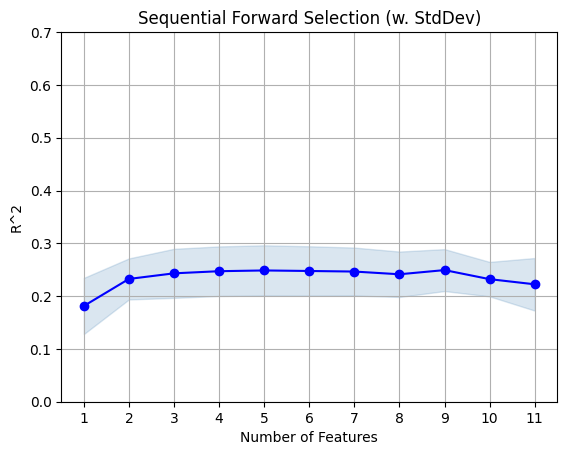

In [117]:
fig = plot_sfs(sfs.get_metric_dict(), ylabel='R^2')
plt.ylim([0, 0.7])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

Let's quickly compare with the full model

In [118]:
regression_model = linear_model.LinearRegression()
regression_model.fit(X, y)

LinearRegression()

In [119]:
y_pred = regression_model.predict(X)
print_results(y_pred, y, "Training results")
y_pred = regression_model.predict(X_test)
print_results(y_pred, y_test, "Test results")
y_pred = regression_model.predict(X_valid)
print_results(y_pred, y_valid, "Test results")

Training results
  Accuracy: 0.456%
  R2: 0.2902849192742134
Test results
  Accuracy: 0.456%
  R2: 0.2744306582787367
Test results
  Accuracy: 0.464%
  R2: 0.30686341922032045


## c) Is the conclusion the same if we do the 30b) analyses separating the wines by color? 

note: develop the models on the train set only; the different prediction models will be compared on the test set.

In [121]:
train.head()

ID groupe  Y_qualite  Z_qualite  couleur  fixed_acidity  volatile_acidity  \
0   1  train          5         OK    rouge            7.4              0.70   
3   4  train          6         OK    rouge           11.2              0.28   
4   5  train          5         OK    rouge            7.4              0.70   
5   6  train          5         OK    rouge            7.4              0.66   
6   7  train          5         OK    rouge            7.9              0.60   

   citric_acid  residual_sugar  chlorides  free_sulfur_dioxide  \
0         0.00             1.9      0.076                 11.0   
3         0.56             1.9      0.075                 17.0   
4         0.00             1.9      0.076                 11.0   
5         0.00             1.8      0.075                 13.0   
6         0.06             1.6      0.069                 15.0   

   total_sulfur_dioxide  density    pH  sulphates  alcohol  
0                    34   0.9978  3.51       0.56      9.4  
3                    60   0.9980  3.16       0.58      9.8  
4                    34   0.9978  3.51       0.56      9.4  
5                    40   0.9978  3.51       0.56      9.4  
6                    59   0.9964  3.30       0.46      9.4

In [149]:
def step_forward_regression(train, test, feature_colum_names, y_column_name):

    X_train, y_train = train[feature_colum_names], train[y_column_name]
    X_test, y_test = test[feature_colum_names], test[y_column_name]


    lr = linear_model.LinearRegression()

    sfs = SFS(lr,
            k_features='parsimonious',
            verbose=0,
            scoring='r2',
            )

    sfs = sfs.fit(X_train, y_train)

    display(pd.DataFrame.from_dict(sfs.get_metric_dict()).T)

    X_train_sfs = sfs.transform(X_train)
    X_test_sfs = sfs.transform(X_test)

    lr.fit(X_train_sfs, y_train)
    y_pred = lr.predict(X_test_sfs)

    k = len(sfs.k_feature_names_)
    n = X.shape[0]
    r2 = sfs.k_score_
    adj_r2 = 1 - (1 - sfs.k_score_) * ((n - 1) / (n - k - 1))

    print(f'\nTrain R2: {r2}')
    print(f'Train adjusted R2: {adj_r2}')
    print(f'Test R2: {r2_score(y_test, y_pred)}')
    print(f'k: {k}')
    pprint(list(sfs.k_feature_names_))
    print("")
    print_results(lr.predict(X_train_sfs), y_train, "Train results", False)
    print_results(y_pred, y_test, "Test results", False)

    fig = plot_sfs(sfs.get_metric_dict(), ylabel='R^2')
    plt.ylim([0, 0.7])
    plt.title('Sequential Forward Selection (w. StdDev)')
    plt.grid()
    plt.show()
    


In [150]:
# Split by color
train_red = train[train[" couleur"] == 'rouge']
train_white = train[train[" couleur"] == 'blanc']

test_red = test[test[" couleur"] == 'rouge']
test_white = test[test[" couleur"] == 'blanc']

~~~ Step forward red wine ~~~~~~~~~~


feature_idx  \
1                                (10,)   
2                              (1, 10)   
3                           (1, 9, 10)   
4                        (1, 6, 9, 10)   
5                     (1, 4, 6, 9, 10)   
6                  (1, 4, 6, 8, 9, 10)   
7               (1, 3, 4, 6, 8, 9, 10)   
8            (1, 2, 3, 4, 6, 8, 9, 10)   
9         (1, 2, 3, 4, 5, 6, 8, 9, 10)   
10     (1, 2, 3, 4, 5, 6, 7, 8, 9, 10)   
11  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)   

                                            cv_scores avg_score  \
1   [0.10779550826825679, 0.1712356710670322, 0.22...  0.180047   
2   [0.22270760842253423, 0.2562386427851072, 0.25...  0.266646   
3   [0.1737113459998343, 0.3124574021667237, 0.269...  0.281594   
4   [0.2326590166348418, 0.3447043079539587, 0.265...  0.295986   
5   [0.2522024726700586, 0.3558421853675273, 0.270...  0.305093   
6   [0.2521941358652906, 0.36810900224473064, 0.26...  0.309562   
7   [0.2553223136632905, 0.36320323130325094, 0.26...  0.309537   
8   [0.25489399146925595, 0.35814818741196075, 0.2...  0.309075   
9   [0.25447606827717384, 0.35708361075581496, 0.2...  0.307085   
10  [0.23517192585321833, 0.35207657205636933, 0.2...  0.302205   
11  [0.2339612242030773, 0.33505124392819663, 0.27...  0.299915   

                                        feature_names  ci_bound   std_dev  \
1                                          (alcohol,)  0.121788  0.094756   
2                         (volatile_acidity, alcohol)  0.111163  0.086488   
3              (volatile_acidity, sulphates, alcohol)  0.122026   0.09494   
4   (volatile_acidity, total_sulfur_dioxide, sulph...  0.124945  0.097212   
5   (volatile_acidity, chlorides, total_sulfur_dio...  0.122847  0.095579   
6   (volatile_acidity, chlorides, total_sulfur_dio...  0.116791  0.090867   
7   (volatile_acidity, residual_sugar, chlorides, ...  0.113822  0.088557   
8   (volatile_acidity, citric_acid, residual_sugar...  0.113164  0.088045   
9   (volatile_acidity, citric_acid, residual_sugar...  0.109398  0.085115   
10  (volatile_acidity, citric_acid, residual_sugar...  0.112749  0.087723   
11  (fixed_acidity, volatile_acidity, citric_acid,...  0.109649  0.085311   

     std_err  
1   0.047378  
2   0.043244  
3    0.04747  
4   0.048606  
5    0.04779  
6   0.045434  
7   0.044279  
8   0.044023  
9   0.042558  
10  0.043861  
11  0.042656


Train R2: 0.29598612982826933
Train adjusted R2: 0.29526609518733693
Test R2: 0.31712888246375237
k: 4
['volatile_acidity', 'total_sulfur_dioxide', 'sulphates', 'alcohol']

Train results
  Accuracy: 0.471%
Test results
  Accuracy: 0.49%


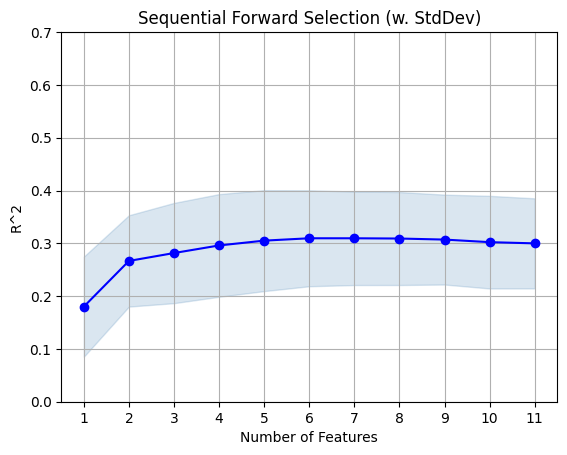

In [151]:
print("~~~ Step forward red wine ~~~~~~~~~~")
step_forward_regression(train_red, test_red, feature_colum_names, "Y_qualite")

~~~ Step forward white wine ~~~~~~~~~~


feature_idx  \
1                                (10,)   
2                              (1, 10)   
3                           (1, 3, 10)   
4                        (1, 3, 5, 10)   
5                     (1, 3, 5, 7, 10)   
6                  (1, 3, 5, 7, 8, 10)   
7               (0, 1, 3, 5, 7, 8, 10)   
8            (0, 1, 3, 5, 6, 7, 8, 10)   
9         (0, 1, 3, 4, 5, 6, 7, 8, 10)   
10     (0, 1, 2, 3, 4, 5, 6, 7, 8, 10)   
11  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)   

                                            cv_scores avg_score  \
1   [0.15260715648012324, 0.2118564706646776, 0.18...  0.169492   
2   [0.2115648224676272, 0.2632672032769846, 0.215...  0.225135   
3   [0.17451825737515614, 0.2912300358740947, 0.23...  0.235066   
4   [0.17869962729239708, 0.3057354257845972, 0.24...   0.24012   
5   [0.17453905074924658, 0.29903650712418683, 0.2...  0.243573   
6   [0.19397427825220448, 0.30305083994174875, 0.2...  0.245996   
7   [0.19731625034942157, 0.3042741965822465, 0.25...  0.246422   
8   [0.19743846989395375, 0.30449202432003275, 0.2...  0.246413   
9   [0.19739280966504658, 0.3044014503364103, 0.25...  0.246098   
10  [0.1964343688506538, 0.3043660606538837, 0.252...  0.245306   
11  [0.20649095649088867, 0.28623135769009866, 0.2...  0.243202   

                                        feature_names  ci_bound   std_dev  \
1                                          (alcohol,)  0.069297  0.053915   
2                         (volatile_acidity, alcohol)  0.054356  0.042291   
3         (volatile_acidity, residual_sugar, alcohol)  0.072125  0.056116   
4   (volatile_acidity, residual_sugar, free_sulfur...  0.071725  0.055804   
5   (volatile_acidity, residual_sugar, free_sulfur...  0.071778  0.055846   
6   (volatile_acidity, residual_sugar, free_sulfur...  0.074211  0.057738   
7   (fixed_acidity, volatile_acidity, residual_sug...  0.069653  0.054192   
8   (fixed_acidity, volatile_acidity, residual_sug...  0.069999  0.054462   
9   (fixed_acidity, volatile_acidity, residual_sug...  0.070059  0.054509   
10  (fixed_acidity, volatile_acidity, citric_acid,...  0.069795  0.054303   
11  (fixed_acidity, volatile_acidity, citric_acid,...  0.069003  0.053687   

     std_err  
1   0.026958  
2   0.021145  
3   0.028058  
4   0.027902  
5   0.027923  
6   0.028869  
7   0.027096  
8   0.027231  
9   0.027254  
10  0.027151  
11  0.026843


Train R2: 0.24012043489258553
Train adjusted R2: 0.23934326325862243
Test R2: 0.2321342708147479
k: 4
['volatile_acidity', 'residual_sugar', 'free_sulfur_dioxide', 'alcohol']

Train results
  Accuracy: 0.441%
Test results
  Accuracy: 0.447%


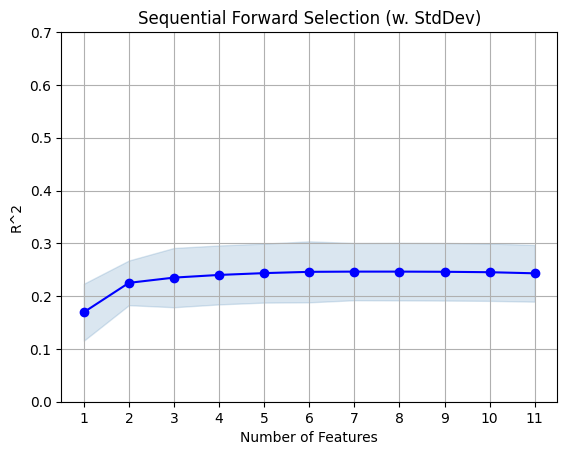

In [152]:
print("~~~ Step forward white wine ~~~~~~~~~~")
step_forward_regression(train_white, test_white, feature_colum_names, "Y_qualite")